## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_xmas_scan_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.055868
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.055868
1    0.059985
2    0.059768
3    0.056401
4    0.052563
5    0.055549
6    0.057958
7    0.059313
8    0.074491
9    0.066345
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.059824
dtype: float64

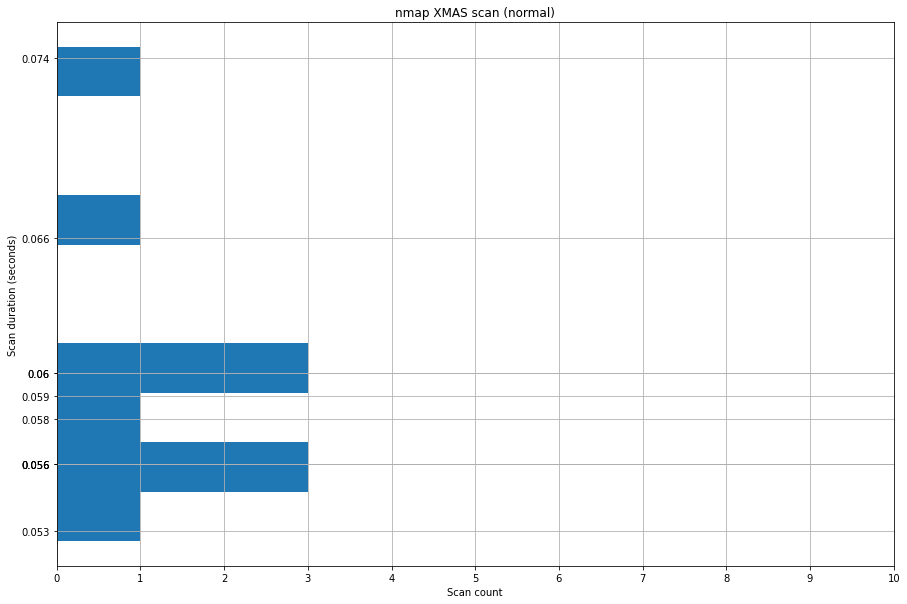

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.059824
std,0.006323
min,0.052563
25%,0.056001
50%,0.058636
75%,0.059931
max,0.074491


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1196.4821815490723



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 46803 8888
2 46803 113
3 46803 995
4 46803 5900
5 46803 23
6 46803 53
7 46803 993
8 46803 8080
9 46803 143
10 46803 1720
11 46803 199
12 46803 22
13 46803 80
14 46803 445
15 46803 111
16 46803 554
17 46803 139
18 46803 25
19 46803 1723
20 46803 3306
21 46803 135
22 46803 3389
23 46803 1025
24 46803 587
25 46803 110
26 46803 21
27 46803 443
28 46803 256
29 46803 3517
30 46803 2099
31 46803 2179
32 46803 1057
33 46803 8300
34 46803 691
35 46803 711
36 46803 8100
37 46803 6502
38 46803 3703
39 46803 8001
40 46803 49175
41 46803 3007
42 46803 7001
43 46803 1053
44 46803 5901
45 46803 1083
46 46803 5061
47 46803 49400
48 46803 7435
49 46803 5925
50 46803 5960
51 46803 13722
52 46803 1068
53 46803 992
54 46803 1112
55 46803 7100
56 46803 5678
57 46803 3918
58 46803 2008
59 46803 146
60 46803 2717
61 46803 705
62 46803 9101
63 46803 2003
64 46803 3322
65 46803 1137
66 46803 8042
67 46803 5009
68 46803 9415
69 46803 340
70 46803 1812
71 46803 16993
72 46803 8333
73 46803 9003
74 46803 1840
7

584 46803 1717
585 46803 1352
586 46803 23502
587 46803 1310
588 46803 3003
589 46803 1666
590 46803 668
591 46803 5679
592 46803 2604
593 46803 911
594 46803 6668
595 46803 10002
596 46803 1114
597 46803 1154
598 46803 5440
599 46803 687
600 46803 1148
601 46803 1121
602 46803 61900
603 46803 2607
604 46803 51493
605 46803 3128
606 46803 9968
607 46803 3333
608 46803 11111
609 46803 1123
610 46803 1011
611 46803 1174
612 46803 8022
613 46803 5915
614 46803 19101
615 46803 15004
616 46803 999
617 46803 1556
618 46803 4001
619 46803 12174
620 46803 3659
621 46803 1095
622 46803 5800
623 46803 6881
624 46803 7007
625 46803 82
626 46803 2020
627 46803 2366
628 46803 9929
629 46803 1104
630 46803 9877
631 46803 3390
632 46803 5911
633 46803 45100
634 46803 5269
635 46803 24800
636 46803 8500
637 46803 42
638 46803 5959
639 46803 5998
640 46803 2399
641 46803 8007
642 46803 7800
643 46803 9503
644 46803 2492
645 46803 5003
646 46803 1009
647 46803 42510
648 46803 7676
649 46803 1875
650 468

709 38077 10215
710 38077 5850
711 38077 6668
712 38077 1271
713 38077 5633
714 38077 2001
715 38077 668
716 38077 7
717 38077 1864
718 38077 20828
719 38077 8000
720 38077 7741
721 38077 1236
722 38077 50389
723 38077 8254
724 38077 1594
725 38077 2602
726 38077 5859
727 38077 280
728 38077 2500
729 38077 9595
730 38077 1077
731 38077 16113
732 38077 9415
733 38077 84
734 38077 1151
735 38077 1310
736 38077 41511
737 38077 1147
738 38077 4567
739 38077 1061
740 38077 7106
741 38077 1033
742 38077 1132
743 38077 5101
744 38077 555
745 38077 1075
746 38077 5405
747 38077 2126
748 38077 3390
749 38077 10001
750 38077 64623
751 38077 1984
752 38077 625
753 38077 1048
754 38077 667
755 38077 8021
756 38077 2382
757 38077 8002
758 38077 161
759 38077 9002
760 38077 5718
761 38077 2909
762 38077 1076
763 38077 1026
764 38077 13722
765 38077 5730
766 38077 5962
767 38077 99
768 38077 3580
769 38077 5989
770 38077 10629
771 38077 9898
772 38077 898
773 38077 389
774 38077 1322
775 38077 52869


777 56551 4662
778 56551 2200
779 56551 2196
780 56551 6004
781 56551 3404
782 56551 1984
783 56551 2034
784 56551 280
785 56551 6101
786 56551 51493
787 56551 1132
788 56551 7
789 56551 8042
790 56551 5101
791 56551 1066
792 56551 3914
793 56551 5440
794 56551 6106
795 56551 2604
796 56551 1138
797 56551 24
798 56551 1839
799 56551 1192
800 56551 8873
801 56551 63331
802 56551 2005
803 56551 90
804 56551 11110
805 56551 2022
806 56551 32773
807 56551 49163
808 56551 37
809 56551 2045
810 56551 9998
811 56551 888
812 56551 1069
813 56551 3851
814 56551 7106
815 56551 3260
816 56551 32785
817 56551 787
818 56551 19801
819 56551 1130
820 56551 2500
821 56551 4567
822 56551 3580
823 56551 7443
824 56551 38292
825 56551 14441
826 56551 5666
827 56551 1090
828 56551 2323
829 56551 7103
830 56551 79
831 56551 5961
832 56551 2119
833 56551 1914
834 56551 1055
835 56551 30718
836 56551 49156
837 56551 5120
838 56551 163
839 56551 5002
840 56551 3971
841 56551 54328
842 56551 6580
843 56551 106

444 34711 8800
445 34711 5999
446 34711 7627
447 34711 19350
448 34711 1248
449 34711 1311
450 34711 40193
451 34711 8081
452 34711 5051
453 34711 2161
454 34711 888
455 34711 5101
456 34711 26214
457 34711 16113
458 34711 5902
459 34711 20221
460 34711 1641
461 34711 5718
462 34711 1096
463 34711 49159
464 34711 2001
465 34711 9071
466 34711 1042
467 34711 2065
468 34711 1185
469 34711 49161
470 34711 144
471 34711 16080
472 34711 16993
473 34711 1533
474 34711 1148
475 34711 9666
476 34711 32785
477 34711 5510
478 34711 163
479 34711 49152
480 34711 1296
481 34711 2382
482 34711 3580
483 34711 765
484 34711 9103
485 34711 5033
486 34711 7496
487 34711 99
488 34711 49176
489 34711 38292
490 34711 51493
491 34711 32779
492 34711 9102
493 34711 646
494 34711 1187
495 34711 1805
496 34711 2038
497 34711 5440
498 34711 1073
499 34711 15000
500 34711 32772
501 34711 13722
502 34711 9593
503 34711 45100
504 34711 8443
505 34711 7937
506 34711 2492
507 34711 8021
508 34711 19315
509 34711 7


110 51667 700
111 51667 720
112 51667 5859
113 51667 21571
114 51667 2119
115 51667 2638
116 51667 5030
117 51667 55600
118 51667 1322
119 51667 7800
120 51667 2013
121 51667 9081
122 51667 15004
123 51667 2809
124 51667 1046
125 51667 1038
126 51667 5915
127 51667 14238
128 51667 9535
129 51667 2041
130 51667 1035
131 51667 1022
132 51667 2105
133 51667 5877
134 51667 5633
135 51667 9011
136 51667 8011
137 51667 2920
138 51667 1244
139 51667 10025
140 51667 8085
141 51667 8010
142 51667 880
143 51667 8654
144 51667 1123
145 51667 5214
146 51667 6510
147 51667 6
148 51667 1021
149 51667 99
150 51667 41511
151 51667 1287
152 51667 1186
153 51667 1057
154 51667 4045
155 51667 1169
156 51667 1935
157 51667 82
158 51667 3784
159 51667 4279
160 51667 10629
161 51667 2394
162 51667 5961
163 51667 1086
164 51667 2607
165 51667 10215
166 51667 801
167 51667 5190
168 51667 11111
169 51667 2251
170 51667 5004
171 51667 19350
172 51667 144
173 51667 6106
174 51667 10001
175 51667 5678
176 51667 1

770 51667 901
771 51667 2179
772 51667 9968
773 51667 1108
774 51667 32779
775 51667 7741
776 51667 465
777 51667 5862
778 51667 3333
779 51667 5226
780 51667 1494
781 51667 9207
782 51667 3905
783 51667 1081
784 51667 1217
785 51667 3367
786 51667 911
787 51667 2002
788 51667 32781
789 51667 2222
790 51667 11110
791 51667 3369
792 51667 1864
793 51667 1755
794 51667 10004
795 51667 27355
796 51667 3261
797 51667 301
798 51667 15742
799 51667 1310
800 51667 32782
801 51667 5414
802 51667 1234
803 51667 4321
804 51667 45100
805 51667 89
806 51667 2608
807 51667 8292
808 51667 57797
809 51667 2260
810 51667 32780
811 51667 2001
812 51667 1328
813 51667 13782
814 51667 10617
815 51667 2401
816 51667 65389
817 51667 1201
818 51667 5950
819 51667 1500
820 51667 3031
821 51667 32778
822 51667 1192
823 51667 3325
824 51667 5560
825 51667 1082
826 51667 2605
827 51667 3077
828 51667 1040
829 51667 16016
830 51667 3920
831 51667 406
832 51667 9103
833 51667 3703
834 51667 8200
835 51667 765
836

443 54937 2557
444 54937 106
445 54937 27352
446 54937 4444
447 54937 7004
448 54937 4126
449 54937 6106
450 54937 26214
451 54937 4125
452 54937 9081
453 54937 1068
454 54937 1900
455 54937 1583
456 54937 1079
457 54937 255
458 54937 1761
459 54937 2111
460 54937 903
461 54937 2126
462 54937 5009
463 54937 32783
464 54937 7402
465 54937 5054
466 54937 5989
467 54937 1185
468 54937 22939
469 54937 1174
470 54937 2401
471 54937 1111
472 54937 32
473 54937 1186
474 54937 2608
475 54937 8600
476 54937 777
477 54937 6668
478 54937 7007
479 54937 1040
480 54937 10778
481 54937 20005
482 54937 60020
483 54937 8500
484 54937 5432
485 54937 5998
486 54937 2106
487 54937 9101
488 54937 9595
489 54937 9001
490 54937 9575
491 54937 10180
492 54937 992
493 54937 8654
494 54937 52822
495 54937 6005
496 54937 6009
497 54937 163
498 54937 2800
499 54937 7938
500 54937 13456
501 54937 27355
502 54937 873
503 54937 4445
504 54937 18040
505 54937 8800
506 54937 3390
507 54937 3814
508 54937 1287
509 549

110 47190 8290
111 47190 726
112 47190 1117
113 47190 49155
114 47190 32774
115 47190 24800
116 47190 999
117 47190 1166
118 47190 1148
119 47190 3283
120 47190 3851
121 47190 1500
122 47190 24444
123 47190 1083
124 47190 2065
125 47190 8010
126 47190 60443
127 47190 10621
128 47190 593
129 47190 5815
130 47190 1935
131 47190 7100
132 47190 20828
133 47190 27000
134 47190 1201
135 47190 8402
136 47190 15000
137 47190 5910
138 47190 1503
139 47190 8045
140 47190 5120
141 47190 1057
142 47190 5963
143 47190 1088
144 47190 2222
145 47190 1093
146 47190 1244
147 47190 7103
148 47190 1812
149 47190 1042
150 47190 33899
151 47190 19101
152 47190 3766
153 47190 1084
154 47190 55056
155 47190 1914
156 47190 1007
157 47190 6789
158 47190 9001
159 47190 1029
160 47190 1641
161 47190 1043
162 47190 4848
163 47190 1033
164 47190 50300
165 47190 1600
166 47190 4445
167 47190 873
168 47190 1501
169 47190 8652
170 47190 2191
171 47190 1090
172 47190 1060
173 47190 2909
174 47190 50800
175 47190 1147


776 47190 3077
777 47190 6106
778 47190 7201
779 47190 880
780 47190 2492
781 47190 1174
782 47190 5061
783 47190 30000
784 47190 9898
785 47190 1038
786 47190 1149
787 47190 1010
788 47190 6389
789 47190 8089
790 47190 5222
791 47190 3920
792 47190 636
793 47190 2869
794 47190 2103
795 47190 9968
796 47190 49400
797 47190 32784
798 47190 9110
799 47190 24
800 47190 17
801 47190 49167
802 47190 543
803 47190 1037
804 47190 17877
805 47190 9666
806 47190 10025
807 47190 5555
808 47190 3325
809 47190 9999
810 47190 9009
811 47190 10617
812 47190 2105
813 47190 6646
814 47190 1077
815 47190 1862
816 47190 9040
817 47190 4567
818 47190 212
819 47190 1947
820 47190 51103
821 47190 5862
822 47190 3784
823 47190 481
824 47190 3168
825 47190 100
826 47190 1123
827 47190 2910
828 47190 3324
829 47190 2022
830 47190 1974
831 47190 6566
832 47190 32780
833 47190 9415
834 47190 8300
835 47190 1071
836 47190 3371
837 47190 83
838 47190 20222
839 47190 3737
840 47190 7025
841 47190 3030
842 47190 20

412 35669 5269
413 35669 27353
414 35669 3005
415 35669 5903
416 35669 1076
417 35669 2301
418 35669 1117
419 35669 1072
420 35669 9593
421 35669 2013
422 35669 2251
423 35669 1862
424 35669 1500
425 35669 2170
426 35669 464
427 35669 9050
428 35669 1108
429 35669 1056
430 35669 1434
431 35669 4000
432 35669 119
433 35669 1247
434 35669 1077
435 35669 3828
436 35669 4279
437 35669 1098
438 35669 6510
439 35669 8002
440 35669 64680
441 35669 9943
442 35669 19801
443 35669 990
444 35669 2103
445 35669 2161
446 35669 10001
447 35669 49159
448 35669 1010
449 35669 5030
450 35669 10616
451 35669 1011
452 35669 9877
453 35669 1277
454 35669 1272
455 35669 2605
456 35669 563
457 35669 2119
458 35669 306
459 35669 5922
460 35669 280
461 35669 722
462 35669 1066
463 35669 8994
464 35669 2045
465 35669 44176
466 35669 8001
467 35669 24444
468 35669 7019
469 35669 1030
470 35669 1111
471 35669 2008
472 35669 1137
473 35669 14238
474 35669 5961
475 35669 2047
476 35669 1213
477 35669 2500
478 3566

609 57810 9103
610 57810 8291
611 57810 3905
612 57810 3826
613 57810 3920
614 57810 1862
615 57810 14238
616 57810 19283
617 57810 9877
618 57810 5800
619 57810 1461
620 57810 3013
621 57810 2809
622 57810 8007
623 57810 14442
624 57810 20031
625 57810 1296
626 57810 2103
627 57810 7402
628 57810 3659
629 57810 1071
630 57810 2003
631 57810 20222
632 57810 35500
633 57810 3371
634 57810 2170
635 57810 2557
636 57810 3889
637 57810 6666
638 57810 5801
639 57810 7938
640 57810 9575
641 57810 1031
642 57810 52673
643 57810 10616
644 57810 1026
645 57810 2043
646 57810 5810
647 57810 5910
648 57810 1064
649 57810 32777
650 57810 13783
651 57810 8652
652 57810 5901
653 57810 6009
654 57810 9595
655 57810 1110
656 57810 6901
657 57810 9050
658 57810 2191
659 57810 5222
660 57810 9003
661 57810 5859
662 57810 49163
663 57810 1034
664 57810 5190
665 57810 8181
666 57810 6788
667 57810 3945
668 57810 10566
669 57810 9943
670 57810 9929
671 57810 2144
672 57810 9099
673 57810 32770
674 57810 11

276 38832 6003
277 38832 51493
278 38832 9415
279 38832 9091
280 38832 51103
281 38832 1594
282 38832 6668
283 38832 56738
284 38832 1113
285 38832 4998
286 38832 10012
287 38832 8200
288 38832 515
289 38832 5901
290 38832 711
291 38832 49155
292 38832 720
293 38832 33899
294 38832 8291
295 38832 8800
296 38832 5298
297 38832 1248
298 38832 5998
299 38832 5431
300 38832 5960
301 38832 4000
302 38832 2196
303 38832 1718
304 38832 5226
305 38832 52848
306 38832 1069
307 38832 5962
308 38832 481
309 38832 1352
310 38832 1105
311 38832 5952
312 38832 7443
313 38832 8654
314 38832 5922
315 38832 873
316 38832 5950
317 38832 2701
318 38832 636
319 38832 82
320 38832 548
321 38832 6566
322 38832 32774
323 38832 563
324 38832 2401
325 38832 6005
326 38832 15660
327 38832 5009
328 38832 3077
329 38832 2038
330 38832 5000
331 38832 5678
332 38832 726
333 38832 416
334 38832 2046
335 38832 7402
336 38832 1310
337 38832 32784
338 38832 9009
339 38832 497
340 38832 3390
341 38832 1037
342 38832 593

942 38832 35500
943 38832 1309
944 38832 3476
945 38832 2920
946 38832 1719
947 38832 1053
948 38832 44176
949 38832 2383
950 38832 3814
951 38832 2190
952 38832 5432
953 38832 6346
954 38832 417
955 38832 1072
956 38832 119
957 38832 1107
958 38832 49175
959 38832 32772
960 38832 2126
961 38832 9502
962 38832 5666
963 38832 389
964 38832 992
965 38832 1154
966 38832 9999
967 38832 8082
968 38832 990
969 38832 6565
970 38832 5087
971 38832 6101
972 38832 3828
973 38832 10024
974 38832 24800
975 38832 9102
976 38832 5999
977 38832 8649
978 38832 306
979 38832 7625
980 38832 2301
981 38832 32780
982 38832 19350
983 38832 5987
984 38832 125
985 38832 10002
986 38832 19801
987 38832 3889
988 38832 5221
989 38832 5120
990 38832 617
991 38832 1236
992 38832 2394
993 38832 30718
994 38832 8651
995 38832 903
996 38832 4
997 38832 41511
998 38832 9876
999 38832 83
1000 38832 5963


In [15]:
orders_port

,scannr,sport,dport
0,1,46803,8888
1,2,46803,113
2,3,46803,995
3,4,46803,5900
4,5,46803,23
...,...,...,...
9995,996,38832,4
9996,997,38832,41511
9997,998,38832,9876
9998,999,38832,83


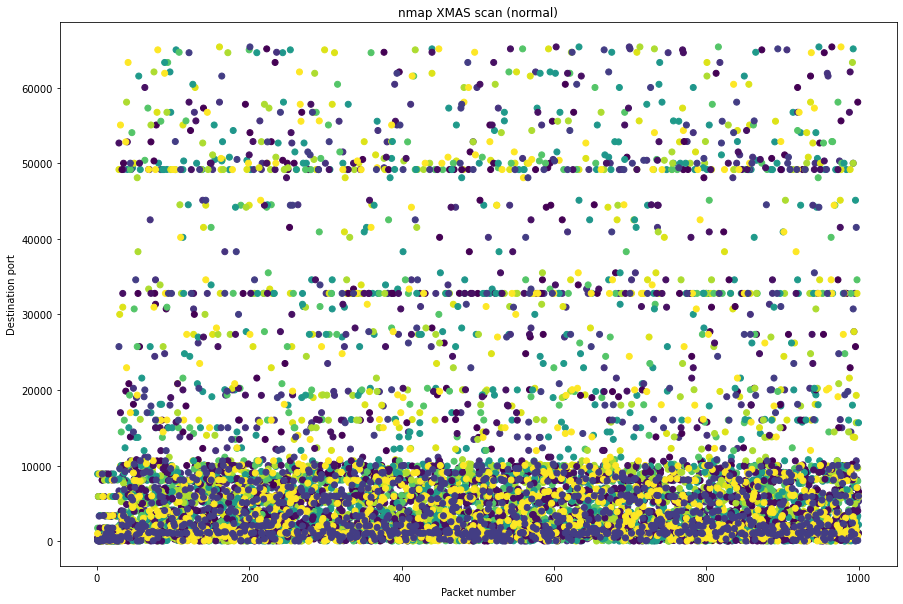

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

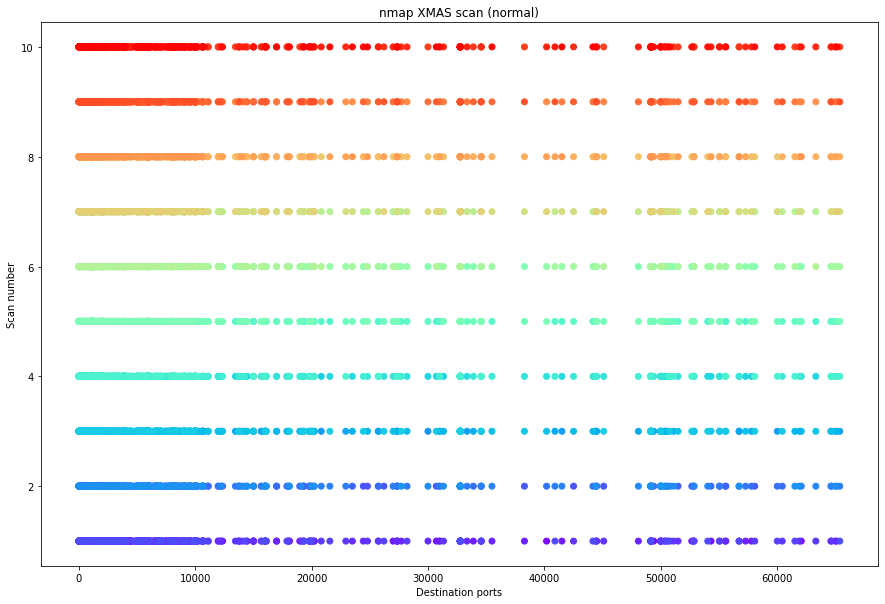

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

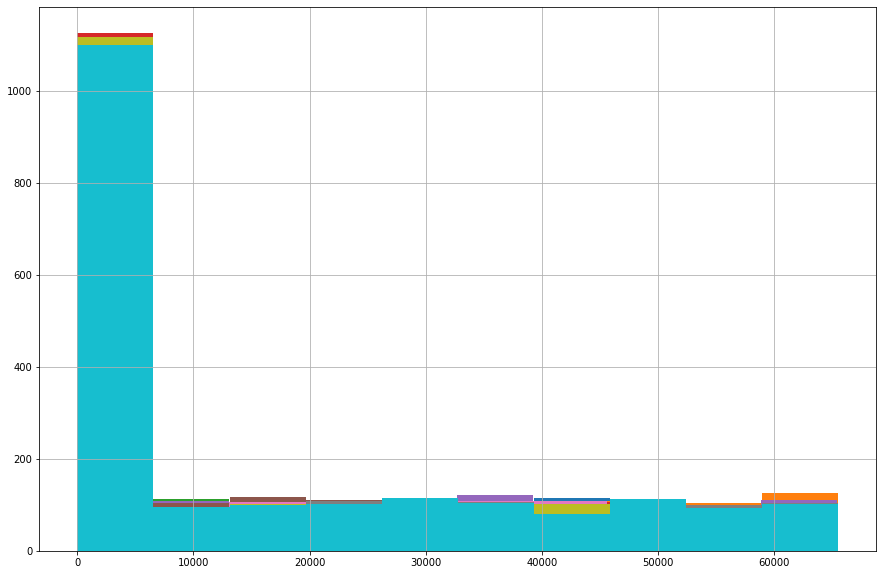

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

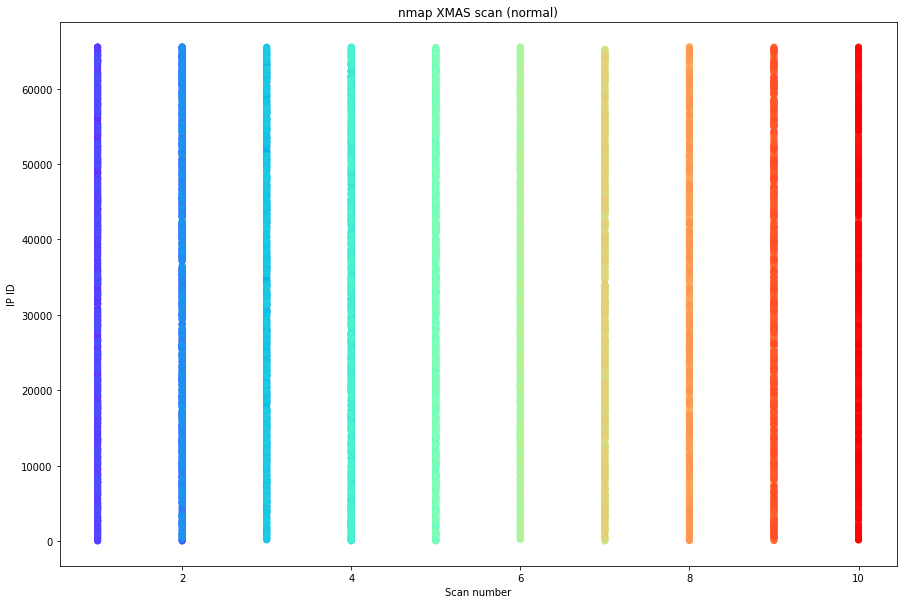

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


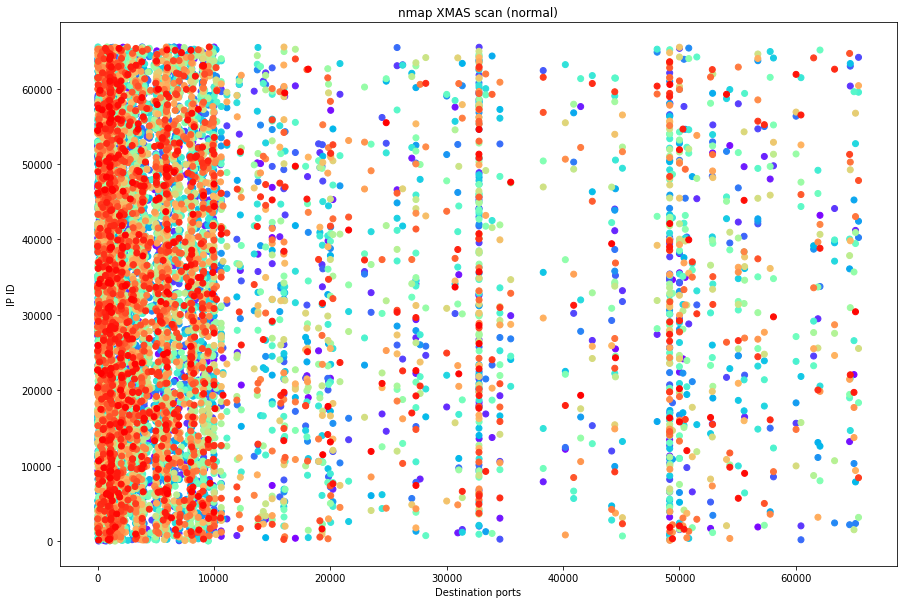

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

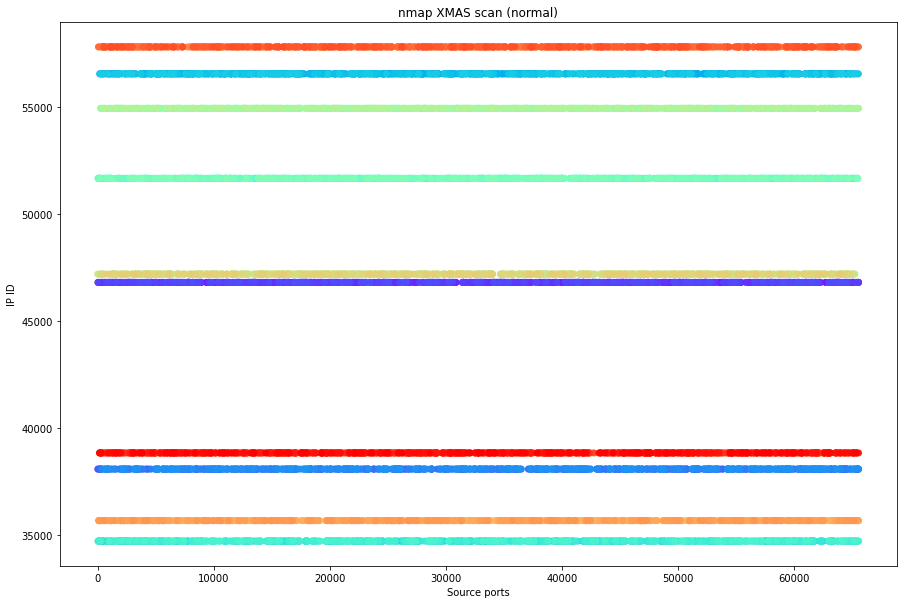

In [36]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])
if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
S

Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
Sequence number: 464895867
S

Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 217

Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 2177524564
Sequence number: 217

Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 315

Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 3155572853
Sequence number: 315

Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 202

Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 2025801588
Sequence number: 202

Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 286

Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 2864748306
Sequence number: 286

Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
S

Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
Sequence number: 514847142
S

Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 204

Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 2044641884
Sequence number: 204

Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
S

Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
Sequence number: 392186728
S

Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
S

Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
Sequence number: 999696815
S

Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 401

Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 4018628703
Sequence number: 401

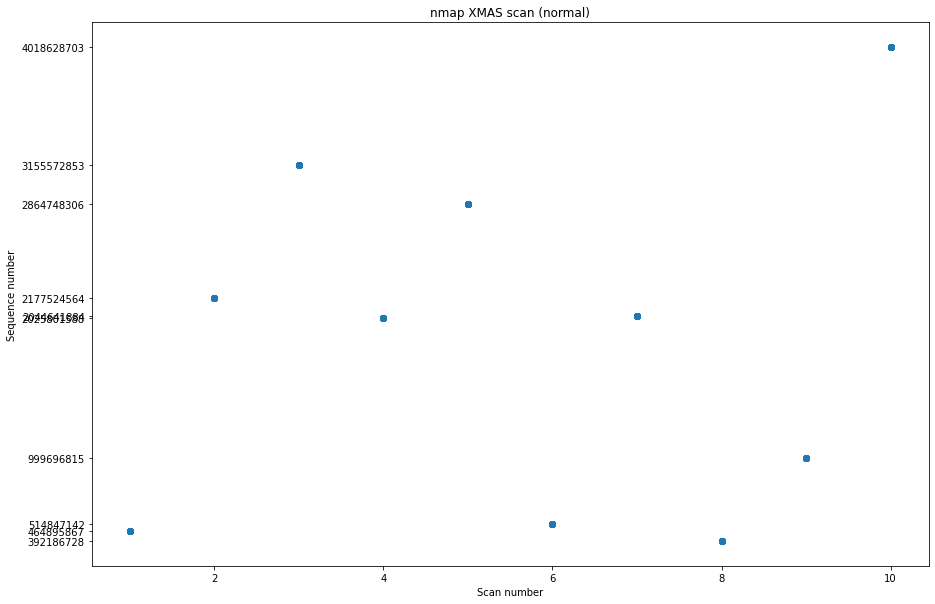

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


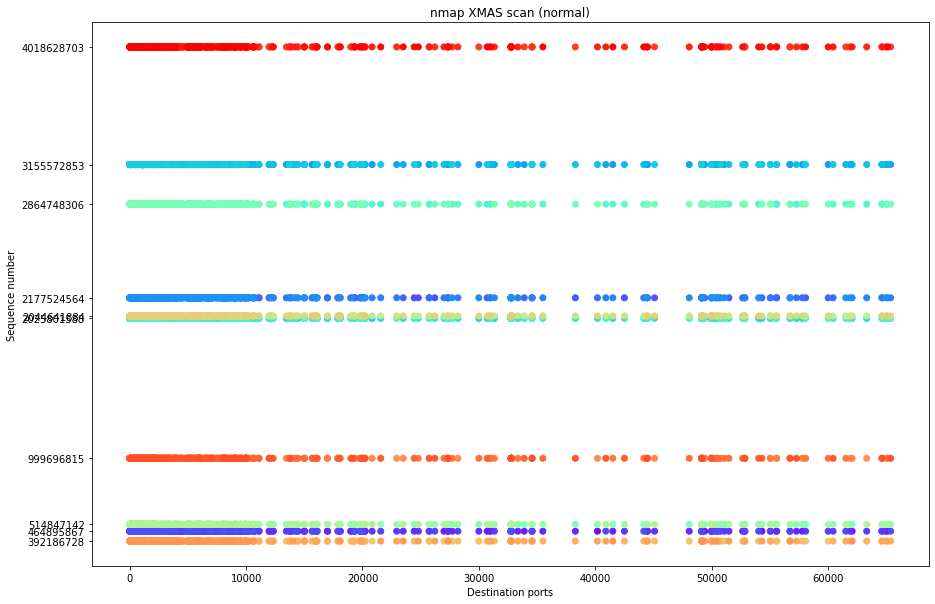

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

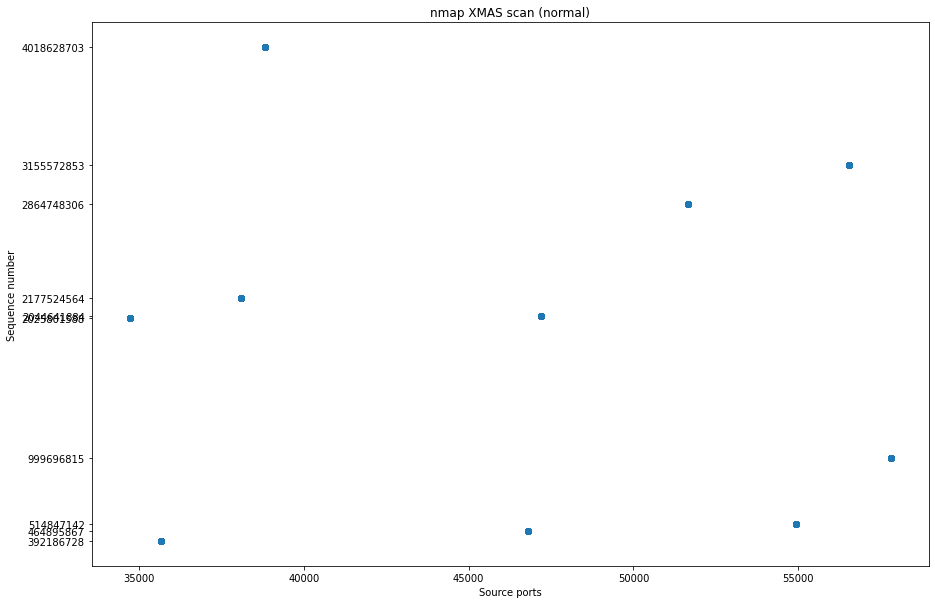

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [35]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU